In [1]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # Adjust if notebook is inside notebooks/
sys.path.append(str(project_root))


In [2]:
# Import modules
from src.data_loader import load_csv
from src.preprocessing import drop_columns, remove_outliers, add_time_features
from src.visualization import (
    lineplot_timeseries, barplot_by_time, correlation_heatmap,
    scatter_plots, wind_rose, bubble_chart
)
from src.analysis import cleaning_impact


In [18]:
# Load data
df = load_csv("../data/raw/benin-malanville.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [17]:
# Clean data
df = drop_columns(df, ["Comments"])
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df_clean = remove_outliers(df, numeric_cols)
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [ ]:
# Add features
df_clean = add_time_features(df_clean)
df_clean.head()

In [7]:
# Quick stats
df_clean.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour,Year
count,517860,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.00000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000,517860.000000
mean,2022-02-07 04:30:32.971035136,236.234508,166.896673,111.656477,232.393310,225.026584,28.146975,54.574586,2.065886,2.737151,0.465109,153.570868,8.526833,994.18638,0.000935,0.001123,35.085631,32.371906,11.508288,2021.600396
min,2021-08-09 00:01:00,-11.100000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.00000,0.000000,0.000000,9.000000,8.100000,0.000000,2021.000000
25%,2021-11-08 00:49:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,29.000000,0.900000,1.300000,0.400000,58.200000,3.600000,993.00000,0.000000,0.000000,24.200000,23.500000,5.000000,2021.000000
50%,2022-02-06 11:47:30,0.700000,-0.100000,0.500000,3.400000,3.200000,27.900000,55.100000,1.900000,2.400000,0.500000,182.300000,8.600000,994.00000,0.000000,0.000000,29.800000,28.800000,11.000000,2022.000000
75%,2022-05-09 17:21:45,468.700000,316.300000,212.000000,448.700000,434.000000,32.300000,80.100000,3.000000,3.900000,0.600000,235.300000,12.200000,996.00000,0.000000,0.000000,46.500000,41.300000,18.000000,2022.000000
max,2022-08-09 00:00:00,1233.000000,952.300000,591.400000,1205.100000,1175.000000,43.800000,100.000000,6.900000,8.700000,2.300000,360.000000,99.400000,1003.00000,1.000000,2.300000,81.000000,72.500000,23.000000,2022.000000
std,NaN,328.288787,262.081997,153.099749,324.256767,314.315996,5.924507,28.010491,1.513137,1.907636,0.260157,102.692758,6.391820,2.46835,0.030557,0.022703,14.738292,12.334820,6.948996,0.489817


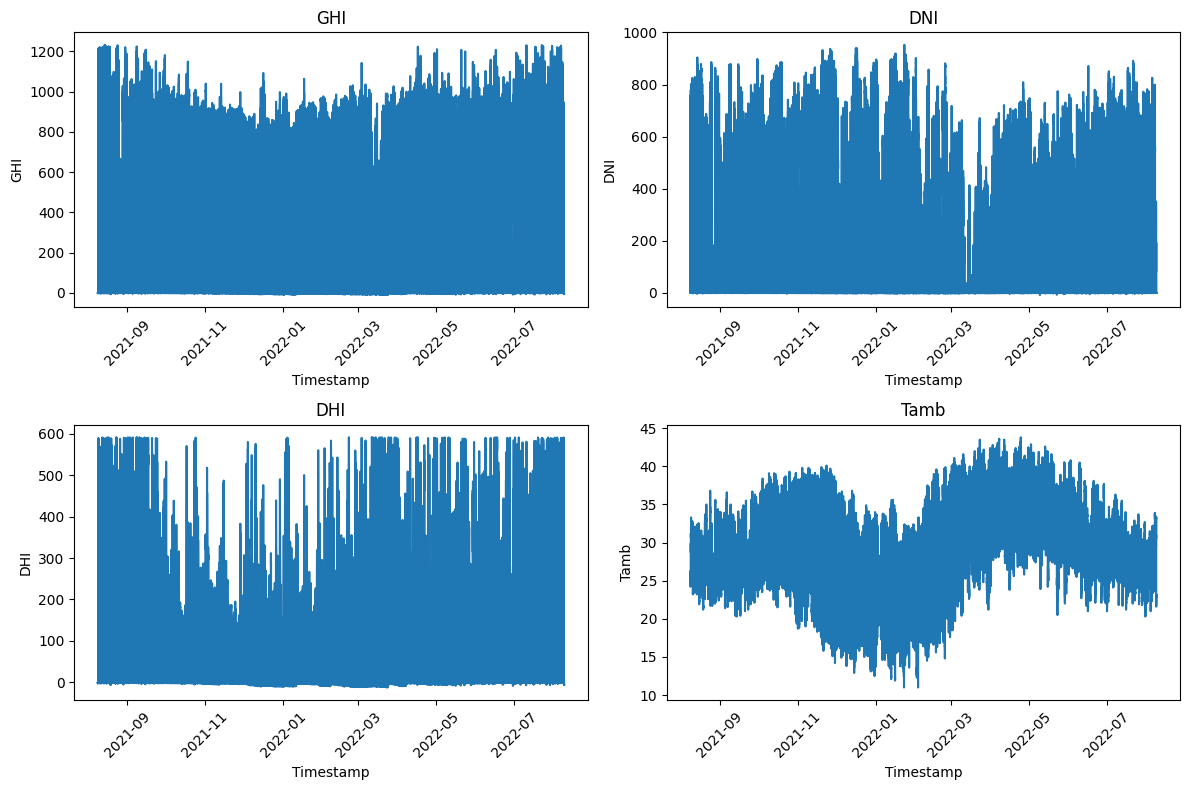

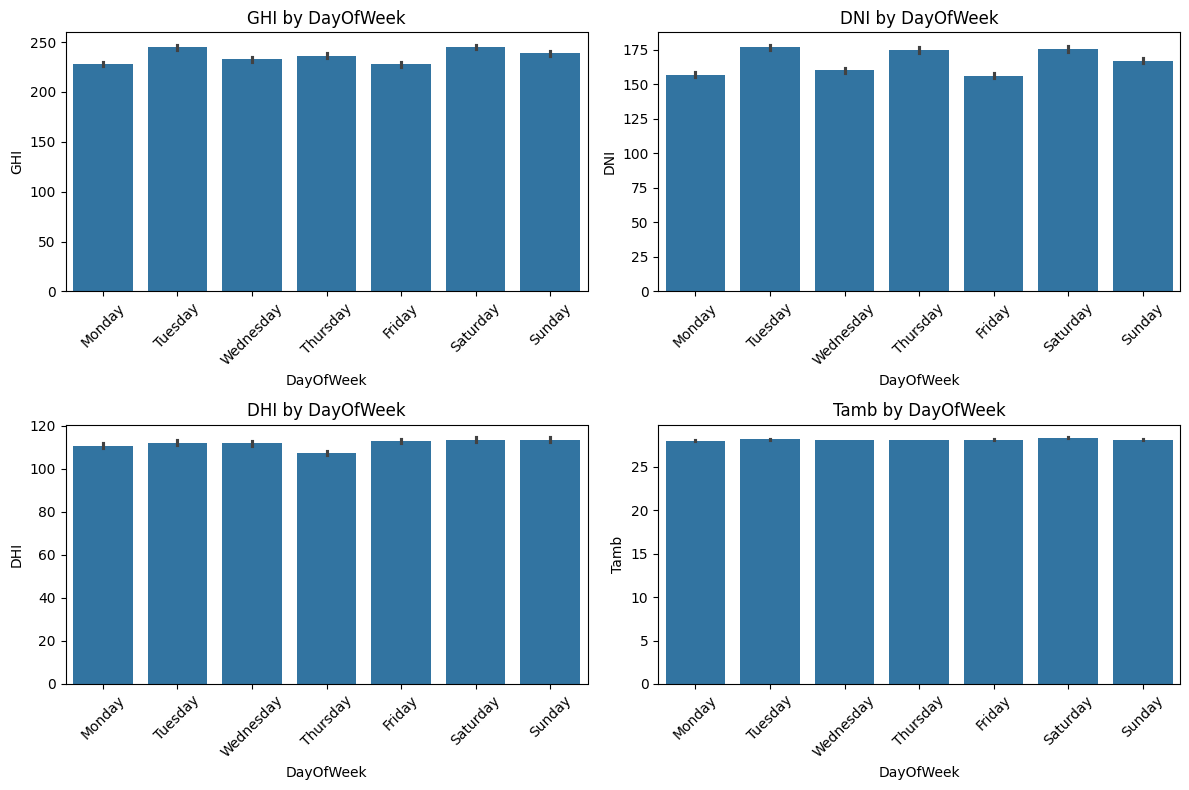

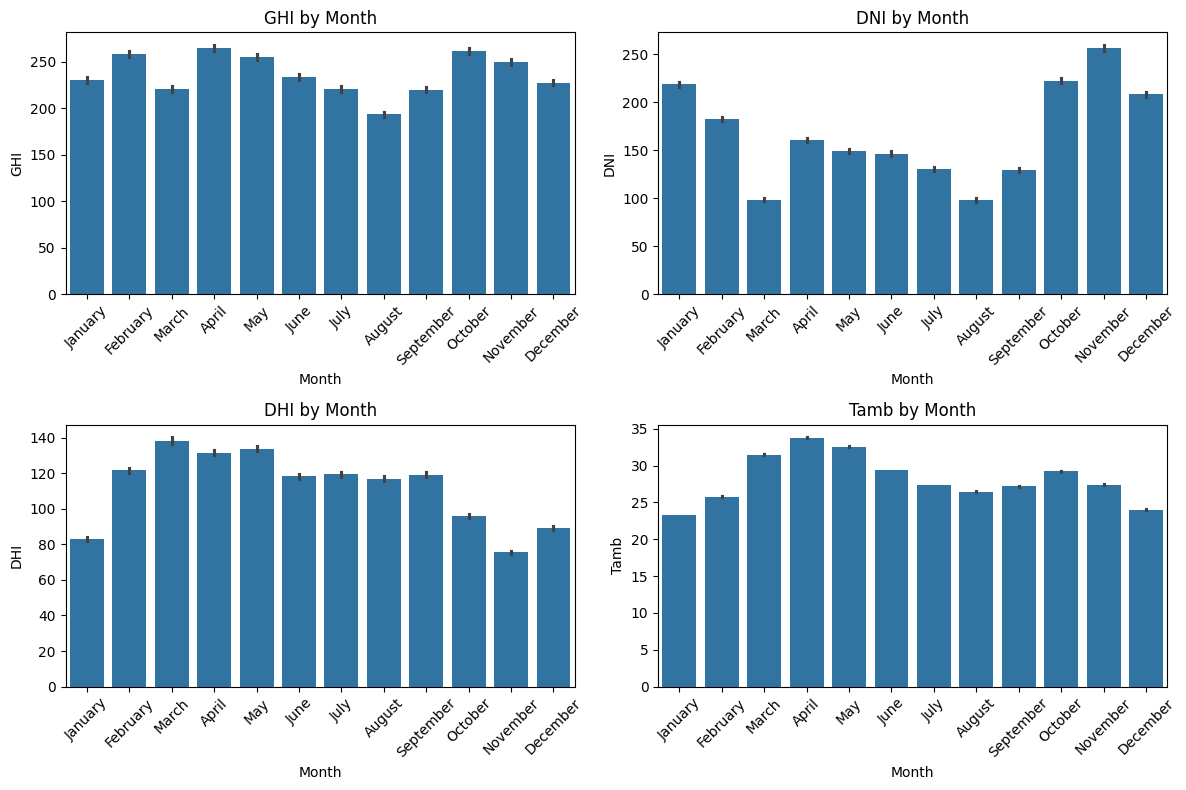

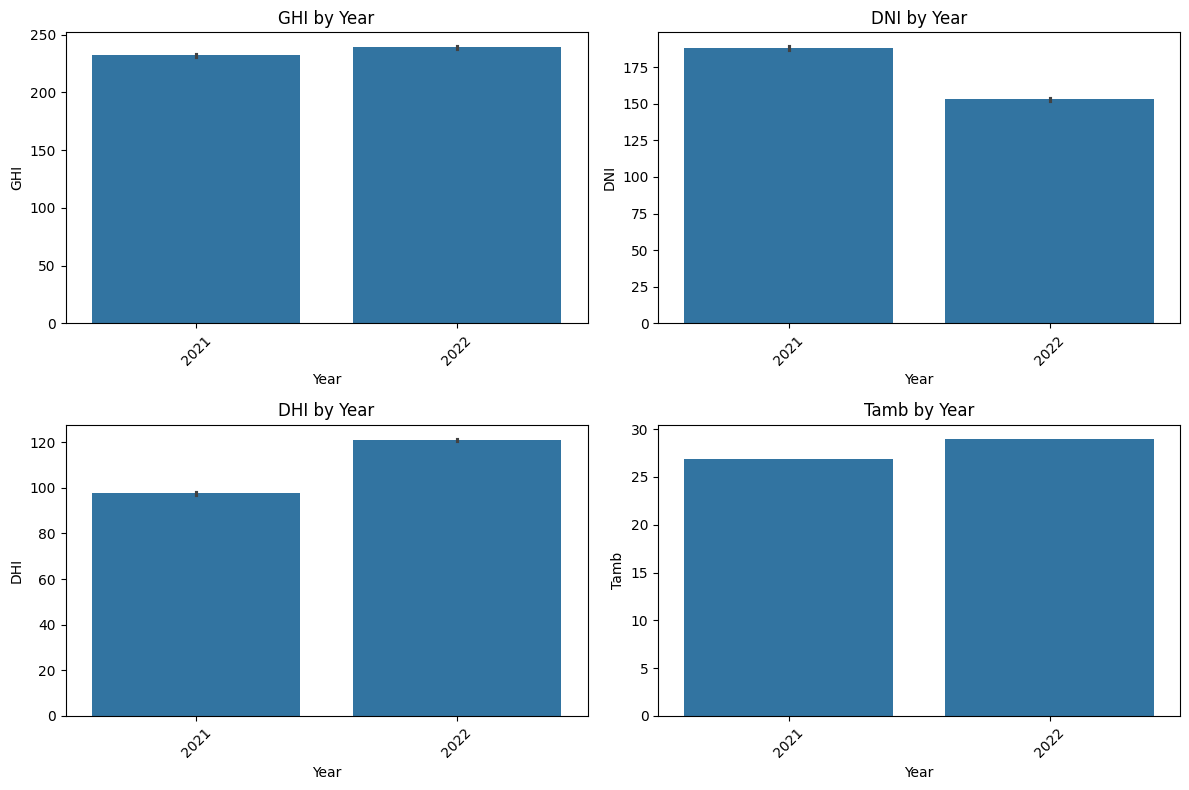

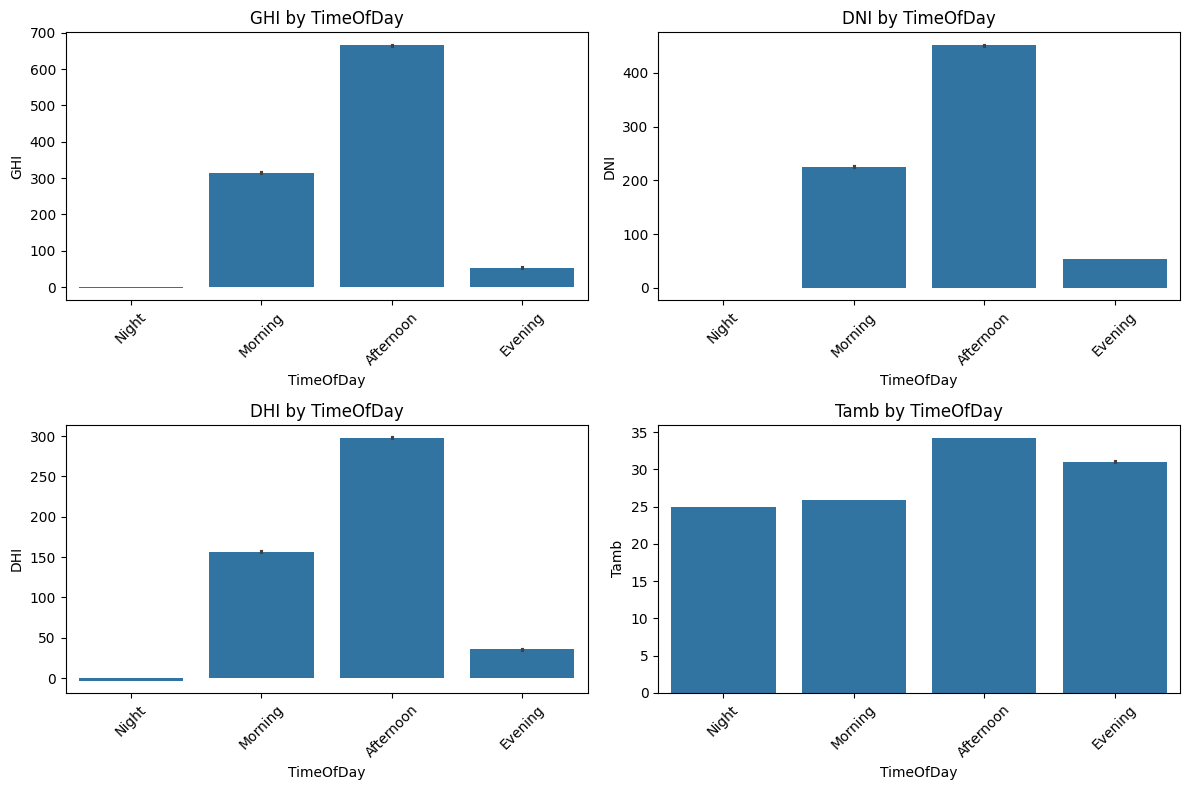

In [8]:
# Visualizations
lineplot_timeseries(df_clean, ["GHI","DNI","DHI","Tamb"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "DayOfWeek",
                order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Month",
                order=["January","February","March","April","May","June",
                       "July","August","September","October","November","December"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Year")
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "TimeOfDay")

<Axes: title={'center': 'Average Module Reading Pre/Post Cleaning'}, xlabel='Cleaning'>

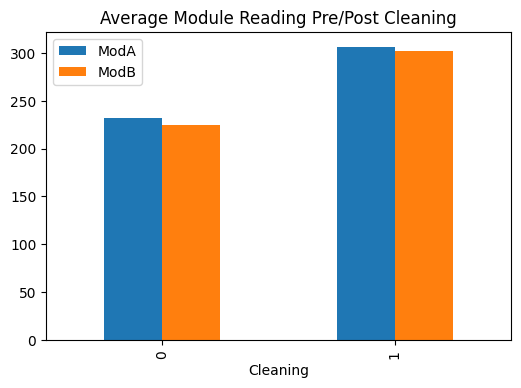

In [9]:
# Cleaning impact
impact = cleaning_impact(df_clean)
impact.plot(kind="bar", figsize=(6,4), title="Average Module Reading Pre/Post Cleaning")

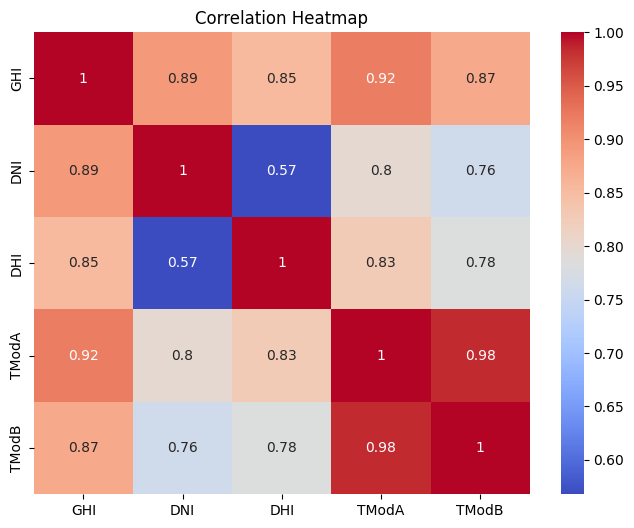

In [10]:
# Correlation
corr = correlation_heatmap(df_clean, ["GHI","DNI","DHI","TModA","TModB"])

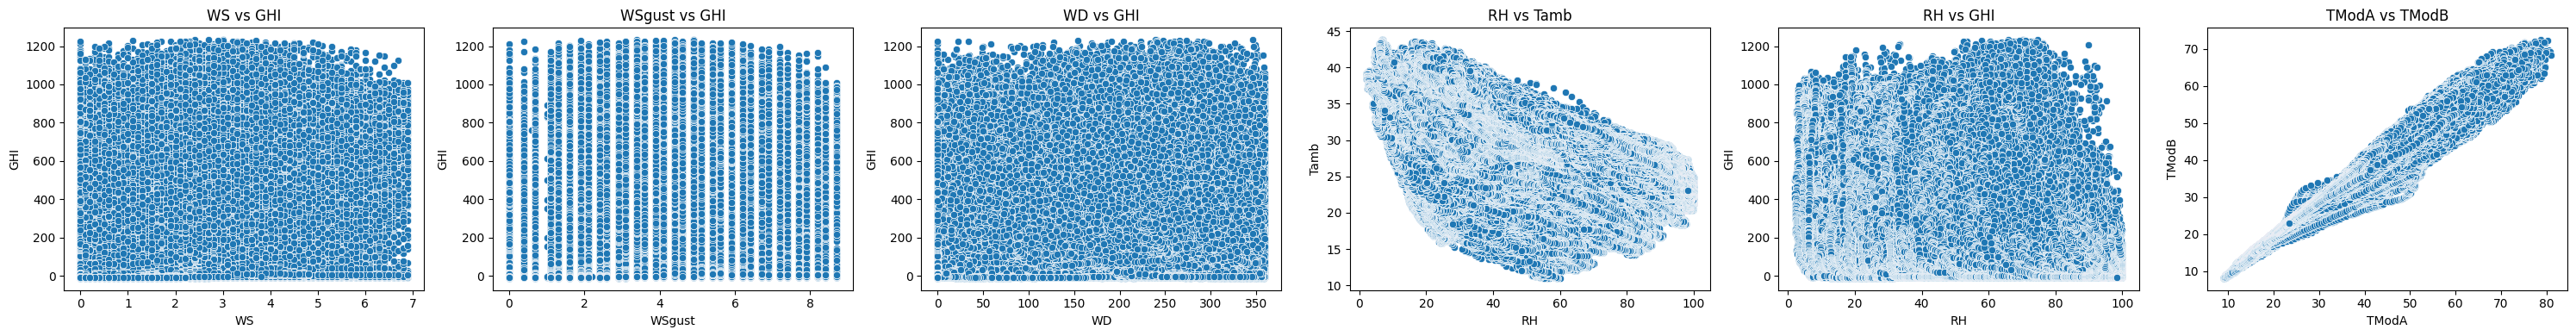

In [11]:
# Scatter plots
scatter_plots(df_clean, [("WS","GHI"), ("WSgust","GHI"), ("WD","GHI"), ("RH","Tamb"), ("RH","GHI"), ("TModA","TModB")])

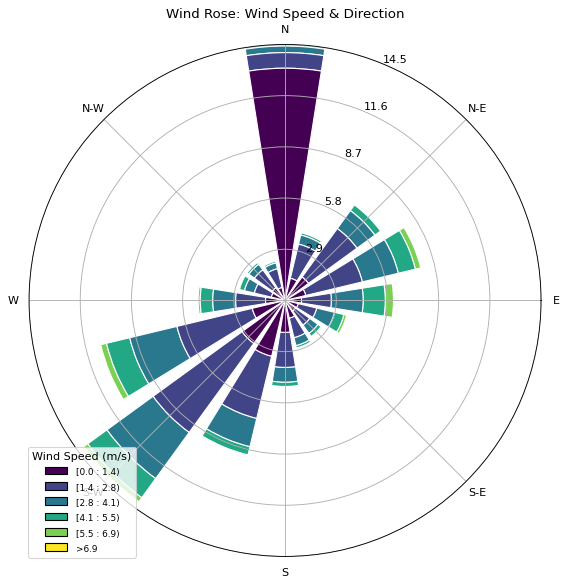

In [12]:
# Wind rose
wind_rose(df_clean)

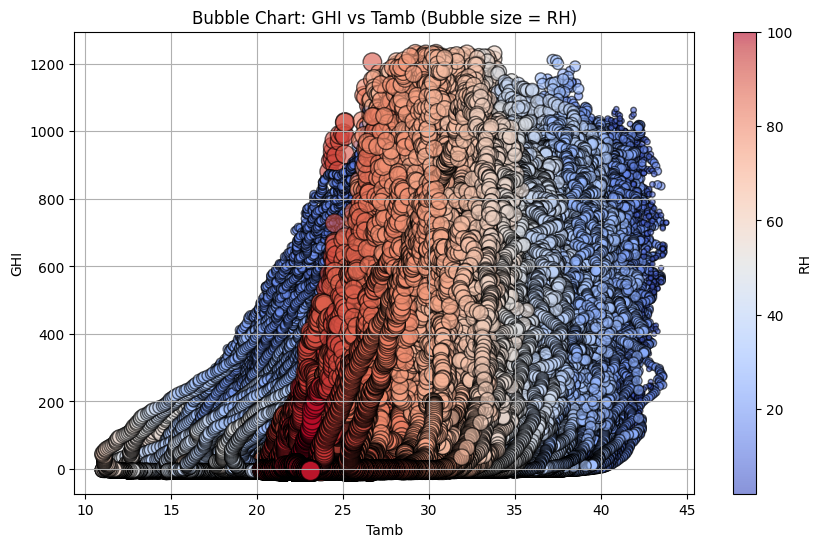

In [13]:
# Bubble chart
bubble_chart(df_clean, "Tamb", "GHI", size_col="RH", color_col="RH")

In [14]:
# Save cleaned data
df_clean.to_csv("../data/processed/benin_clean.csv", index=False)